In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Darbin Rawal\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

# Load the CSV file
data = pd.read_csv("reviews.csv")

# Preview the first 5 rows of the dataset
print(data.head())

                                          ReviewText  Rating SentimentLabel  \
0  An amazing read with a gripping story. Loved i...       2       Negative   
1  Fits perfectly and looks great! Would definite...       4       Positive   
2  Terrible fit and poor quality fabric. I would ...       3        Neutral   
3  The plot was boring, and the writing was subpa...       2       Negative   
4   An amazing read with a gripping story. Loved it!       5       Positive   

  ProductCategory  ReviewDate ReviewerInformation  
0           Books  2017-10-08           Isaac1980  
1        Clothing  2022-09-27           Jenna9171  
2        Clothing  2023-09-02         Charles4223  
3           Books  2015-10-11          Robert4825  
4           Books  2020-01-01        Samantha6078  


In [4]:
print(data.info())  # Check data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ReviewText           10000 non-null  object
 1   Rating               10000 non-null  int64 
 2   SentimentLabel       10000 non-null  object
 3   ProductCategory      10000 non-null  object
 4   ReviewDate           10000 non-null  object
 5   ReviewerInformation  10000 non-null  object
dtypes: int64(1), object(5)
memory usage: 468.9+ KB
None


In [5]:
print(data.describe())  # Get summary statistics

             Rating
count  10000.000000
mean       2.993400
std        1.420197
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000


In [6]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ReviewText           10000 non-null  object
 1   Rating               10000 non-null  int64 
 2   SentimentLabel       10000 non-null  object
 3   ProductCategory      10000 non-null  object
 4   ReviewDate           10000 non-null  object
 5   ReviewerInformation  10000 non-null  object
dtypes: int64(1), object(5)
memory usage: 468.9+ KB
None


In [8]:
print(data['SentimentLabel'].value_counts())

SentimentLabel
Negative    4031
Positive    3993
Neutral     1976
Name: count, dtype: int64


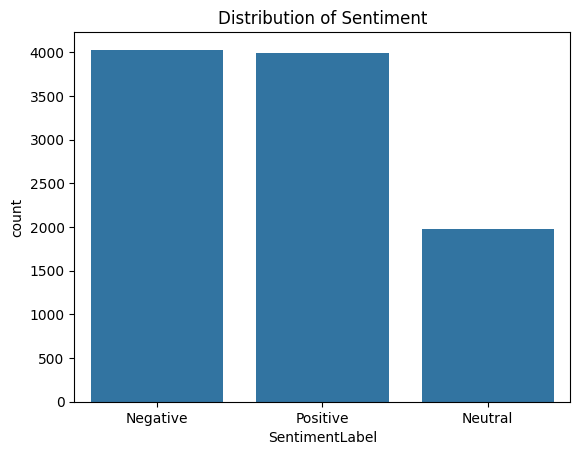

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='SentimentLabel', data=data)
plt.title("Distribution of Sentiment")
plt.show()

In [10]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Darbin Rawal\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [11]:
import nltk
nltk.download('stopwords')  # Downloads the stopwords
nltk.download('punkt')      # Downloads the tokenizer model
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package stopwords to C:\Users\Darbin
[nltk_data]     Rawal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Darbin
[nltk_data]     Rawal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
stop_words = set(stopwords.words('english'))

def preprocess_text(review):
    # Convert text to lowercase and tokenize
    tokens = word_tokenize(review.lower())
    # Remove stopwords and non-alphabetic tokens
    cleaned_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    # Return cleaned text as a single string
    return ' '.join(cleaned_tokens)

In [17]:
print(data.columns)

Index(['ReviewText', 'Rating', 'SentimentLabel', 'ProductCategory',
       'ReviewDate', 'ReviewerInformation'],
      dtype='object')


In [18]:
data['Cleaned_Review'] = data['ReviewText'].apply(preprocess_text)


In [19]:
print(data['Cleaned_Review'].head())

0    amazing read gripping story loved would defini...
1    fits perfectly looks great would definitely co...
2    terrible fit poor quality fabric would recomme...
3    plot boring writing subpar would recommend anyone
4                    amazing read gripping story loved
Name: Cleaned_Review, dtype: object


In [27]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Darbin
[nltk_data]     Rawal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Darbin
[nltk_data]     Rawal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize the stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define the text preprocessing function with lemmatization
def preprocess_text_with_lemmatization(review):
    tokens = word_tokenize(review.lower())  # Tokenize and convert to lowercase
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(lemmatized_tokens)

# Apply the function to your data
data['Cleaned_Review'] = data['ReviewText'].apply(preprocess_text_with_lemmatization)


In [29]:
print(data['Cleaned_Review'].head())

0    amazing read gripping story loved would defini...
1    fit perfectly look great would definitely cons...
2    terrible fit poor quality fabric would recomme...
3    plot boring writing subpar would recommend anyone
4                    amazing read gripping story loved
Name: Cleaned_Review, dtype: object


In [30]:
X = data['Cleaned_Review']  # Feature: Preprocessed text of the review
y = data['SentimentLabel']       # Label: The sentiment associated with the review

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer  # or CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Initialize the vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the text data into a numerical format
X = vectorizer.fit_transform(data['Cleaned_Review'])  # Replace 'Cleaned_Review' with your actual column
y = data['SentimentLabel']  # Replace with your sentiment column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier()

# Perform cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", scores)


Cross-validation scores: [0.395625 0.40625  0.394375 0.40375  0.40125 ]


In [36]:
print(type(X_train))
print(X_train[:5])  # To print the first 5 examples


<class 'scipy.sparse._csr.csr_matrix'>
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 31 stored elements and shape (5, 43)>
  Coords	Values
  (0, 41)	0.27853718172890257
  (0, 31)	0.33473998439844543
  (0, 1)	0.33473998439844543
  (0, 25)	0.4178263168124936
  (0, 4)	0.4178263168124936
  (0, 42)	0.4178263168124936
  (0, 35)	0.4178263168124936
  (1, 41)	0.2776225860470683
  (1, 31)	0.333640843011404
  (1, 1)	0.333640843011404
  (1, 8)	0.4184176368969816
  (1, 13)	0.4184176368969816
  (1, 22)	0.4184176368969816
  (1, 10)	0.4184176368969816
  (2, 25)	0.5
  (2, 4)	0.5
  (2, 42)	0.5
  (2, 35)	0.5
  (3, 14)	0.3607298925591535
  (3, 36)	0.4663351650407305
  (3, 26)	0.4663351650407305
  (3, 28)	0.4663351650407305
  (3, 11)	0.4663351650407305
  (4, 41)	0.2602544867814232
  (4, 14)	0.30960202062917036
  (4, 36)	0.4002393823333404
  (4, 26)	0.4002393823333404
  (4, 28)	0.4002393823333404
  (4, 11)	0.4002393823333404
  (4, 31)	0.31276823547970584
  (4, 1)	0.31276823547970584


In [4]:
print(data.columns)


Index(['ReviewText', 'Rating', 'SentimentLabel', 'ProductCategory',
       'ReviewDate', 'ReviewerInformation'],
      dtype='object')


In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords if you haven't already
nltk.download('stopwords')

# Define the preprocessing function
stop_words = set(stopwords.words('english'))

def preprocess_text(review):
    tokens = word_tokenize(review.lower())  # Convert to lowercase and tokenize
    return ' '.join([word for word in tokens if word.isalpha() and word not in stop_words])

# Assuming your raw review data is in a column named 'Review'
data['Cleaned_Review'] = data['ReviewText'].apply(preprocess_text)

# Now you should have the 'Cleaned_Review' column
print(data['Cleaned_Review'].head())  # Verify the cleaned reviews


[nltk_data] Downloading package stopwords to C:\Users\Darbin
[nltk_data]     Rawal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    amazing read gripping story loved would defini...
1    fits perfectly looks great would definitely co...
2    terrible fit poor quality fabric would recomme...
3    plot boring writing subpar would recommend anyone
4                    amazing read gripping story loved
Name: Cleaned_Review, dtype: object


In [6]:
# Assuming 'Cleaned_Review' is now created
X = data['Cleaned_Review']  # Features (cleaned text)
y = data['SentimentLabel']  # Labels (sentiment)

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Continue with vectorization and model training


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to top 5000 features

# Fit and transform the training data, and transform the test data
X_train_tfidf = vectorizer.fit_transform(X_train)  # Fit to training data and transform it
X_test_tfidf = vectorizer.transform(X_test)        # Only transform the test data (already fit)


In [8]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model using the TF-IDF-transformed training data
model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000)

In [9]:
model = LogisticRegression(C=1.0, max_iter=1000)  # You can try adjusting 'C' for regularization

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Assuming your model is a LogisticRegression instance
model = LogisticRegression()

# Fit the model with training data
model.fit(X_train_tfidf, y_train)

# Now, you can make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Print a detailed classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Negative       0.39      0.56      0.46       789
     Neutral       0.00      0.00      0.00       408
    Positive       0.40      0.43      0.41       803

    accuracy                           0.39      2000
   macro avg       0.26      0.33      0.29      2000
weighted avg       0.31      0.39      0.35      2000



C:\Users\Darbin Rawal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Darbin Rawal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Darbin Rawal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [16]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Darbin Rawal\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Ensure NLTK resources are downloaded (uncomment if not done)
# import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')

# Step 1: Load the dataset into 'data' variable
data = pd.read_csv("reviews.csv")  # Replace with the correct file path

# Step 2: Check column names
print(data.columns)

# Step 3: Preprocess the text data
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove non-alphabetic characters (you can adjust this as needed)
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenize the text (split it into words)
    words = text.split()
    
    # Remove stopwords (common words like 'the', 'and', 'is', etc.)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Lemmatize words (reducing words to their base form)
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join words back into a single string
    return ' '.join(words)

# Apply the preprocessing function to the 'ReviewText' column (replace with your actual text column)
data['Cleaned_Review'] = data['ReviewText'].apply(preprocess_text)

# Step 4: Split the data into training and testing sets
X = data['Cleaned_Review']  # Use the actual name of your text column
y = data['SentimentLabel']  # Use the actual name of your label column (ensure it matches)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 6: Apply SMOTE to balance the classes in the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Step 7: Train the Logistic Regression model on the resampled data
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Step 8: Predict and evaluate the model
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))


Index(['ReviewText', 'Rating', 'SentimentLabel', 'ProductCategory',
       'ReviewDate', 'ReviewerInformation'],
      dtype='object')
              precision    recall  f1-score   support

    Negative       0.43      0.24      0.31       789
     Neutral       0.22      0.44      0.29       408
    Positive       0.41      0.37      0.39       803

    accuracy                           0.33      2000
   macro avg       0.35      0.35      0.33      2000
weighted avg       0.38      0.33      0.34      2000



In [5]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the model
rf_model.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

    Negative       0.39      0.61      0.48       789
     Neutral       0.00      0.00      0.00       408
    Positive       0.40      0.39      0.39       803

    accuracy                           0.40      2000
   macro avg       0.26      0.33      0.29      2000
weighted avg       0.31      0.40      0.35      2000



C:\Users\Darbin Rawal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Darbin Rawal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Darbin Rawal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [6]:
print(y_train.value_counts())

SentimentLabel
Negative    3242
Positive    3190
Neutral     1568
Name: count, dtype: int64


In [7]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)
X_resampled, y_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Train the model again
rf_model.fit(X_resampled, y_resampled)
y_pred_rf = rf_model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

    Negative       0.41      0.31      0.35       789
     Neutral       0.22      0.40      0.28       408
    Positive       0.40      0.32      0.36       803

    accuracy                           0.34      2000
   macro avg       0.34      0.35      0.33      2000
weighted avg       0.37      0.34      0.34      2000



In [8]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)
X_resampled, y_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Train the model again
rf_model.fit(X_resampled, y_resampled)
y_pred_rf = rf_model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

    Negative       0.41      0.31      0.35       789
     Neutral       0.22      0.40      0.28       408
    Positive       0.40      0.32      0.36       803

    accuracy                           0.34      2000
   macro avg       0.34      0.35      0.33      2000
weighted avg       0.37      0.34      0.34      2000



In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=3)
grid_search.fit(X_resampled, y_resampled)

# Best parameters found
print("Best Parameters:", grid_search.best_params_)

# Use best model to predict
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred_best_rf))


Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

    Negative       0.41      0.31      0.35       789
     Neutral       0.22      0.40      0.28       408
    Positive       0.40      0.32      0.36       803

    accuracy                           0.34      2000
   macro avg       0.34      0.35      0.33      2000
weighted avg       0.37      0.34      0.34      2000



In [10]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_tfidf, y_train)
y_pred_rf = rf_model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

    Negative       0.39      0.33      0.36       789
     Neutral       0.20      0.41      0.27       408
    Positive       0.40      0.25      0.31       803

    accuracy                           0.31      2000
   macro avg       0.33      0.33      0.31      2000
weighted avg       0.36      0.31      0.32      2000



In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced'), param_grid=param_grid, cv=3)
grid_search.fit(X_resampled, y_resampled)

# Best parameters found
print("Best Parameters:", grid_search.best_params_)

# Use best model to predict
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred_best_rf))


Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
              precision    recall  f1-score   support

    Negative       0.42      0.29      0.34       789
     Neutral       0.22      0.40      0.28       408
    Positive       0.40      0.35      0.38       803

    accuracy                           0.34      2000
   macro avg       0.35      0.35      0.33      2000
weighted avg       0.37      0.34      0.34      2000



In [12]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(class_weight='balanced', random_state=42)
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

    Negative       0.42      0.32      0.36       789
     Neutral       0.21      0.35      0.26       408
    Positive       0.41      0.37      0.39       803

    accuracy                           0.34      2000
   macro avg       0.35      0.34      0.34      2000
weighted avg       0.37      0.34      0.35      2000



In [14]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 1.3/124.9 MB 6.2 MB/s eta 0:00:21
   - -------------------------------------- 3.9/124.9 MB 10.9 MB/s eta 0:00:12
   - -------------------------------------- 3.9/124.9 MB 10.9 MB/s eta 0:00:12
   -- ------------------------------------- 9.2/124.9 MB 11.3 MB/s eta 0:00:11
   ---- ----------------------------------- 13.1/124.9 MB 12.8 MB/s eta 0:00:09
   ----- ---------------------------------- 16.8/124.9 MB 13.6 MB/s eta 0:00:08
   ------ --------------------------------- 20.7/124.9 MB 14.4 MB/s eta 0:00:08
   ------- -------------------------------- 24.4/124.9 MB 14.8 MB/s eta 0:00:07
   -------- ------------------------------- 28.0/124.9 MB 15.2 MB/s eta 0:00:07
   ---------- ----------------------------- 31.7/124.9 MB 15.4 MB/s eta 0:00:07
   ----------- ---------------------------- 35.4/124.9 MB 15.6 


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Darbin Rawal\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [15]:
import xgboost
print(xgboost.__version__)

2.1.3


In [17]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Get the class labels (use the actual name of your target column)
classes = np.unique(y_train)

# Calculate class weights based on the training labels
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)

# Convert the output to a dictionary for the model
class_weight_dict = dict(zip(classes, class_weights))


In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert the string labels to numeric labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create the XGBClassifier model
xgb_model = XGBClassifier(random_state=42)

# Fit the model
xgb_model.fit(X_train_tfidf, y_train_encoded)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_tfidf)

# Print the classification report with numeric labels
print(classification_report(y_test_encoded, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.39      0.63      0.48       789
           1       0.00      0.00      0.00       408
           2       0.40      0.36      0.38       803

    accuracy                           0.39      2000
   macro avg       0.26      0.33      0.29      2000
weighted avg       0.31      0.39      0.34      2000



C:\Users\Darbin Rawal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Darbin Rawal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Darbin Rawal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [26]:
print(y_train.value_counts())  # Check the distribution of classes in the training data

SentimentLabel
Negative    3242
Positive    3190
Neutral     1568
Name: count, dtype: int64


In [28]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from xgboost import XGBClassifier

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_encoded), y=y_train_encoded)
class_weight_dict = dict(zip(np.unique(y_train_encoded), class_weights))

# Convert class weights into a weight array
sample_weights = np.array([class_weight_dict[label] for label in y_train_encoded])

# Create the XGBClassifier
xgb_model = XGBClassifier(random_state=42, n_estimators=100, max_depth=6)

# Fit the model with sample weights
xgb_model.fit(X_train_tfidf, y_train_encoded, sample_weight=sample_weights)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_tfidf)

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_encoded, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.40      0.30      0.34       789
           1       0.21      0.46      0.29       408
           2       0.40      0.25      0.31       803

    accuracy                           0.31      2000
   macro avg       0.34      0.34      0.31      2000
weighted avg       0.36      0.31      0.32      2000



In [29]:
xgb_model = XGBClassifier(
    random_state=42,
    n_estimators=100,
    max_depth=6,
    min_child_weight=1,
    colsample_bytree=0.8,
    subsample=0.8
)

# Fit the model
xgb_model.fit(X_train_tfidf, y_train_encoded)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_tfidf)

# Print the classification report
print(classification_report(y_test_encoded, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.39      0.61      0.48       789
           1       0.00      0.00      0.00       408
           2       0.40      0.39      0.39       803

    accuracy                           0.40      2000
   macro avg       0.26      0.33      0.29      2000
weighted avg       0.31      0.40      0.35      2000



C:\Users\Darbin Rawal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Darbin Rawal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Darbin Rawal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [30]:
from sklearn.metrics import classification_report

# Print the classification report with zero_division set to 1 (or any other value you prefer)
print(classification_report(y_test_encoded, y_pred_xgb, zero_division=1))


              precision    recall  f1-score   support

           0       0.39      0.61      0.48       789
           1       1.00      0.00      0.00       408
           2       0.40      0.39      0.39       803

    accuracy                           0.40      2000
   macro avg       0.60      0.33      0.29      2000
weighted avg       0.52      0.40      0.35      2000



In [31]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train_encoded)

# Create the XGBClassifier
xgb_model = XGBClassifier(random_state=42, n_estimators=300, max_depth=6)

# Fit the model with the resampled data
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_tfidf)

# Print the classification report
print(classification_report(y_test_encoded, y_pred_xgb, zero_division=1))


              precision    recall  f1-score   support

           0       0.41      0.31      0.35       789
           1       0.22      0.40      0.28       408
           2       0.40      0.32      0.36       803

    accuracy                           0.34      2000
   macro avg       0.34      0.35      0.33      2000
weighted avg       0.37      0.34      0.34      2000



In [32]:
from imblearn.over_sampling import RandomOverSampler

# Apply RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_tfidf, y_train_encoded)

# Fit and predict as usual
xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb_model.predict(X_test_tfidf)

# Print the classification report
print(classification_report(y_test_encoded, y_pred_xgb, zero_division=1))


              precision    recall  f1-score   support

           0       0.42      0.20      0.27       789
           1       0.22      0.40      0.28       408
           2       0.41      0.44      0.42       803

    accuracy                           0.34      2000
   macro avg       0.35      0.35      0.33      2000
weighted avg       0.37      0.34      0.33      2000



In [33]:
from sklearn.metrics import classification_report

# Print the classification report with zero_division=1
print(classification_report(y_test_encoded, y_pred_xgb, zero_division=1))


              precision    recall  f1-score   support

           0       0.42      0.20      0.27       789
           1       0.22      0.40      0.28       408
           2       0.41      0.44      0.42       803

    accuracy                           0.34      2000
   macro avg       0.35      0.35      0.33      2000
weighted avg       0.37      0.34      0.33      2000



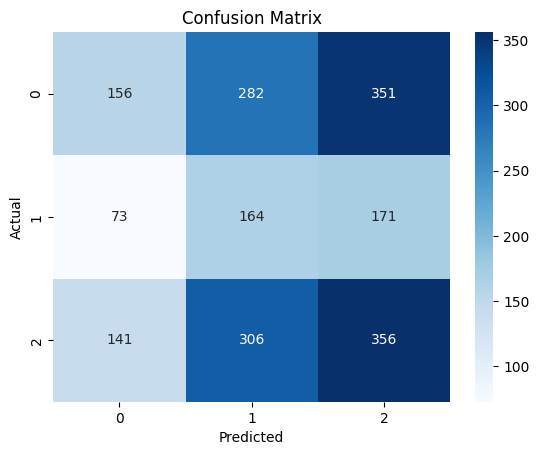

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_encoded, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'min_child_weight': [1, 3, 5],
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)
print("Best parameters found: ", grid_search.best_params_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters found:  {'learning_rate': 0.01, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 200}


In [39]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


Cross-validation accuracy: 0.3408 ± 0.0104


In [40]:
import joblib
joblib.dump(xgb_model, 'xgb_model.joblib')


['xgb_model.joblib']

In [41]:
pip install flask


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Darbin Rawal\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [42]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Darbin Rawal\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

data = pd.read_csv("reviews.csv")
print(data.head())


                                          ReviewText  Rating SentimentLabel  \
0  An amazing read with a gripping story. Loved i...       2       Negative   
1  Fits perfectly and looks great! Would definite...       4       Positive   
2  Terrible fit and poor quality fabric. I would ...       3        Neutral   
3  The plot was boring, and the writing was subpa...       2       Negative   
4   An amazing read with a gripping story. Loved it!       5       Positive   

  ProductCategory  ReviewDate ReviewerInformation  
0           Books  2017-10-08           Isaac1980  
1        Clothing  2022-09-27           Jenna9171  
2        Clothing  2023-09-02         Charles4223  
3           Books  2015-10-11          Robert4825  
4           Books  2020-01-01        Samantha6078  


In [3]:
data = data.dropna().drop_duplicates()

In [5]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def preprocess_text(review):
    tokens = word_tokenize(review.lower())
    return ' '.join([word for word in tokens if word.isalpha() and word not in stop_words])

data['Cleaned_Review'] = data['ReviewText'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to C:\Users\Darbin
[nltk_data]     Rawal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Darbin
[nltk_data]     Rawal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
print(data['Cleaned_Review'].head())

0    amazing read gripping story loved would defini...
1    fits perfectly looks great would definitely co...
2    terrible fit poor quality fabric would recomme...
3    plot boring writing subpar would recommend anyone
4                    amazing read gripping story loved
Name: Cleaned_Review, dtype: object


In [7]:
data.to_csv("cleaned_reviews.csv", index=False)

In [8]:
from sklearn.model_selection import train_test_split

X = data['Cleaned_Review']  # Independent variable: the processed review text.
y = data['SentimentLabel']       # Target variable: sentiment labels (e.g., 0 for negative, 1 for positive).

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer with a maximum of 5000 features
vectorizer = TfidfVectorizer(max_features=5000)

# Fit the vectorizer on training data and transform it into numerical features
X_train_tfidf = vectorizer.fit_transform(X_train)

# Use the trained vectorizer to transform the test data
X_test_tfidf = vectorizer.transform(X_test)

In [10]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
model = LogisticRegression()

# Train (fit) the model using the TF-IDF transformed training data
model.fit(X_train_tfidf, y_train)


LogisticRegression()

In [19]:
from sklearn.metrics import classification_report

# Predict sentiments for the test set
y_pred = model.predict(X_test_tfidf)

# Print a detailed classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Negative       0.40      0.43      0.42       789
     Neutral       0.00      0.00      0.00       408
    Positive       0.40      0.58      0.47       803

    accuracy                           0.40      2000
   macro avg       0.27      0.34      0.30      2000
weighted avg       0.32      0.40      0.35      2000



C:\Users\Darbin Rawal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Darbin Rawal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Darbin Rawal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [14]:
print(data['SentimentLabel'].value_counts())

SentimentLabel
Negative    4031
Positive    3993
Neutral     1976
Name: count, dtype: int64


In [15]:
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))

In [16]:
model = LogisticRegression(class_weight='balanced')


In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']
}

grid = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, cv=5)
grid.fit(X_train_tfidf, y_train)
print("Best parameters:", grid.best_params_)
model = grid.best_estimator_

Best parameters: {'C': 1, 'solver': 'liblinear'}


In [18]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

    Negative       0.40      0.43      0.42       789
     Neutral       0.00      0.00      0.00       408
    Positive       0.40      0.58      0.47       803

    accuracy                           0.40      2000
   macro avg       0.27      0.34      0.30      2000
weighted avg       0.32      0.40      0.35      2000



In [20]:
import pickle

In [21]:
with open("tfidf_vectorizer.pkl", "wb") as vec_file:
    pickle.dump(vectorizer, vec_file)

In [22]:
with open("logistic_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

In [23]:
# Test loading the saved TF-IDF vectorizer
with open("tfidf_vectorizer.pkl", "rb") as vec_file:
    loaded_vectorizer = pickle.load(vec_file)

# Test loading the saved Logistic Regression model
with open("logistic_model.pkl", "rb") as model_file:
    loaded_model = pickle.load(model_file)

# Check the loaded objects
print(loaded_vectorizer)
print(loaded_model)

TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
LogisticRegression(C=1, class_weight='balanced', solver='liblinear')


In [25]:
pip install streamlit scikit-learn nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Darbin Rawal\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [29]:
vectorizer = TfidfVectorizer()
vectorized_data = vectorizer.fit_transform(data['ReviewText'])  # Fit on training data

In [30]:
import pickle
with open("tfidf_vectorizer.pkl", "wb") as vec_file:
    pickle.dump(vectorizer, vec_file)

In [31]:
with open("tfidf_vectorizer.pkl", "wb") as vec_file:
    pickle.dump(vectorizer, vec_file)
with open("logistic_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)


In [32]:
import pickle

# Load pre-trained vectorizer and model
with open("tfidf_vectorizer.pkl", "rb") as vec_file:
    vectorizer = pickle.load(vec_file)

with open("logistic_model.pkl", "rb") as model_file:
    model = pickle.load(model_file)


In [33]:
# Test if vectorizer is fitted
try:
    vectorizer.transform(["test"])
    print("Vectorizer is loaded and fitted successfully!")
except Exception as e:
    print("Error:", e)

Vectorizer is loaded and fitted successfully!
